In [1]:
import pandas as pd
import os
import numpy as np

## Where our data is

In [13]:
dataset_dir = "./nlp-telegram-locations-extractions"
ru_geo_dataset_path = os.path.join(dataset_dir, "ru_geo_dataset.csv")
uk_geo_dataset_path = os.path.join(dataset_dir, "uk_geo_dataset.csv")

In [14]:
df = pd.read_csv(uk_geo_dataset_path, skiprows=lambda x: x > 10000)

In [15]:
df.head()

,text,loc_markers,org_markers,per_markers,is_valid
0,"Чим довше мають скачки тиску гіпертензією, тим...",[],[],[],0
1,"А поки що починали цвісти троянди, випускники ...",[],[],"[(114, 131)]",0
2,"Крім того, в 2020 р. багато експертів прогнозу...",[],[],[],0
3,"Сильно сумніваюся, що ви зупините свій вибір н...",[],[],[],0
4,Цей унікальний правовий важіль утворено 1998 р...,[],[],[],0


In [16]:
df2 = pd.read_csv(ru_geo_dataset_path, skiprows=lambda x: x > 10000)

In [17]:
df2.head()

,text,loc_markers,org_markers,per_markers,doc_id,sent_id
0,Вице-премьер по социальным вопросам Татьяна Го...,"[(82, 88)]","[(149, 160)]","[(36, 52)]",0,0
1,"По словам Голиковой, чаще всего онкологические...","[(89, 98), (100, 108), (110, 118), (121, 139),...",[],"[(10, 19)]",0,1
2,"Вице-премьер напомнила, что главные факторы см...","[(57, 63)]",[],[],0,2
3,"В начале года стало известно, что смертность о...",[],[],[],0,3
4,"По данным Росстата, в 2017 году от рака умерли...",[],"[(10, 18)]",[],0,4


In [ ]:
def string_to_indices(s):
    if len(s) < 3:
        return []
    ints = [int(l[:-1]) if i%2 == 1 else int(l[1:]) for i,l in enumerate(s[1:-1].split(", "))]
    return [ints[i:i+2] for i in range(0,len(ints),2)]

In [152]:
def get_statistics(df):
    N = len(df.values)
    markers = [string_to_indices(i[1]) for i in df.values]
    sent_length = [len(i[0]) for i in df.values]
    span_length = [sum([i[1]-i[0] for i in m]) for m in markers]
    n_markers = [len(i) for i in markers]
    return np.array(n_markers),np.array(sent_length), np.array(span_length)
        
    

In [153]:
import numpy as np

In [154]:
n_markers,sent_length,span_length = get_statistics(df)

In [155]:
import matplotlib.pyplot as plt

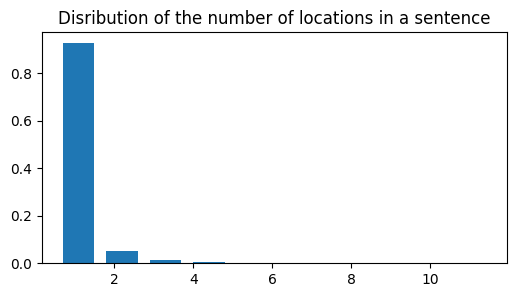

In [169]:
h = np.histogram(n_markers)
plt.figure(figsize=(6,3))
plt.bar(h[1][1:],h[0]/len(n_markers))
plt.title("Disribution of the number of locations in a sentence")
plt.show()

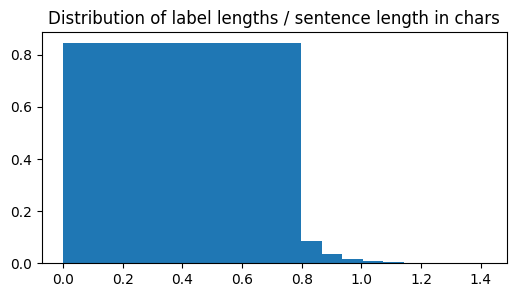

In [170]:
h = np.histogram(span_length/sent_length)
h[1][1:] += 0.33
plt.figure(figsize=(6,3))
plt.bar(h[1][1:],h[0]/len(n_markers))
plt.title("Distribution of label lengths / sentence length in chars")
plt.show()